In [1]:
print("Hello, this is a live cell!")

Hello, this is a live cell!


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 10            # number of arms
steps = 1000      # number of steps per run
runs = 500        # keep small for speed in Thebe
epsilon = 0.1     # epsilon-greedy

# Track rewards and optimal actions
all_rewards = np.zeros((runs, steps))
optimal_action_counts = np.zeros((runs, steps))

# Simulation
for run in range(runs):
    q_star = np.random.normal(0, 1, k)
    optimal_action = np.argmax(q_star)
    
    Q = np.zeros(k)
    N = np.zeros(k)
    
    for t in range(steps):
        if np.random.rand() < epsilon:
            action = np.random.randint(k)
        else:
            action = np.argmax(Q)

        reward = np.random.normal(q_star[action], 1)
        all_rewards[run, t] = reward
        
        if action == optimal_action:
            optimal_action_counts[run, t] = 1
        
        N[action] += 1
        alpha = 1 / N[action]
        Q[action] += alpha * (reward - Q[action])

# Results
avg_rewards = all_rewards.mean(axis=0)
optimal_action_percent = optimal_action_counts.mean(axis=0) * 100

# Output final Q estimates and optimal action
print("Final estimated Q-values:", Q)
print("True action values (q*):", q_star)
print("Final selected action:", np.argmax(Q))

Final estimated Q-values: [-0.54456623  0.71721629  1.35592756  0.94256074 -0.26339398 -1.28195301
 -0.23887762 -0.6556406   0.43073732 -1.11778146]
True action values (q*): [-0.18293183  0.64475799  1.39930322  0.85391634 -0.54708275 -0.82542438
  0.01241669 -0.91112363  0.25991129 -1.31917149]
Final selected action: 2


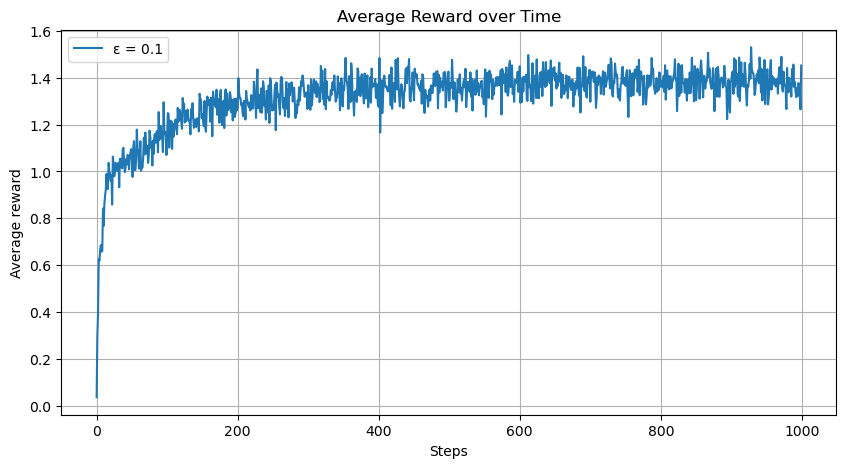

In [3]:
# Plot average reward
plt.figure(figsize=(10, 5))
plt.plot(avg_rewards, label=f"ε = {epsilon}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.title("Average Reward over Time")
plt.legend()
plt.grid(True)
plt.show()


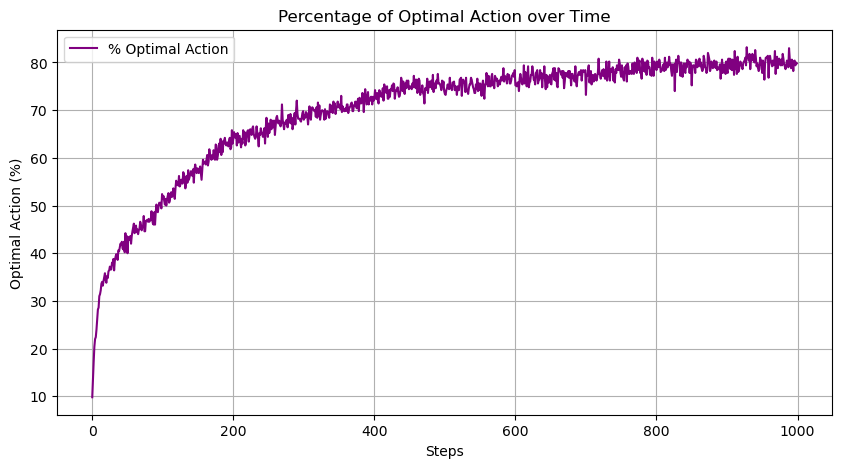

In [4]:
# Plot % optimal action
plt.figure(figsize=(10, 5))
plt.plot(optimal_action_percent, label="% Optimal Action", color="purple")
plt.xlabel("Steps")
plt.ylabel("Optimal Action (%)")
plt.title("Percentage of Optimal Action over Time")
plt.legend()
plt.grid(True)
plt.show()
